In [34]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.***

***We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We’ll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model. Lastly, we will use joblib available in sklearn to save our model for future use.***

In [2]:
#Loading data

df = pd.read_csv("diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#shape
df.shape

(768, 9)

In [4]:
#checking the null values
df.isnull().values.any()

False

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Exploratory Analysis

***Checking out the distribution of patient age.***

<module 'matplotlib.pyplot' from 'C:\\Users\\Krishna Vamshi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

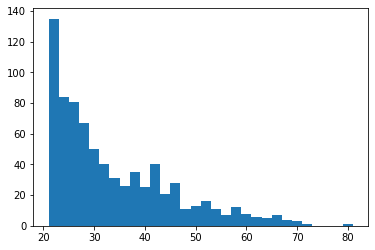

In [7]:
plt.hist(df['Age'],bins=30)
plt

***Graph is highly skwed to left side that means 20 - 40 age patients are high in number***

<AxesSubplot:xlabel='Outcome', ylabel='count'>

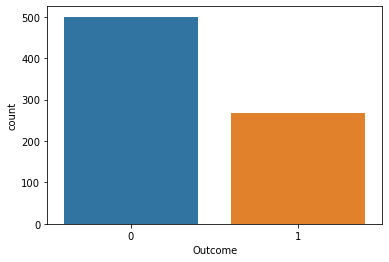

In [8]:
sns.countplot(x='Outcome',data=df)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

***Patients with no diabetes are high in number almost double to diabetes patients and I think target is baised***

In [10]:
 # to check the average values under each column for diabetic and non diabetic
df.groupby('Outcome').mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


***When comparing Diabetes and Non_Diabetes patients, patients with diabetes having high values in avarage in Glucose levels, Blood pressure levels BML etc...***

### Checking outliers in data

***It is key part when we are choosing Logistic regression algorithm or any distance based algorithms because they are case sensitive to outliers***

***Visualizing outliers with Boxplot***

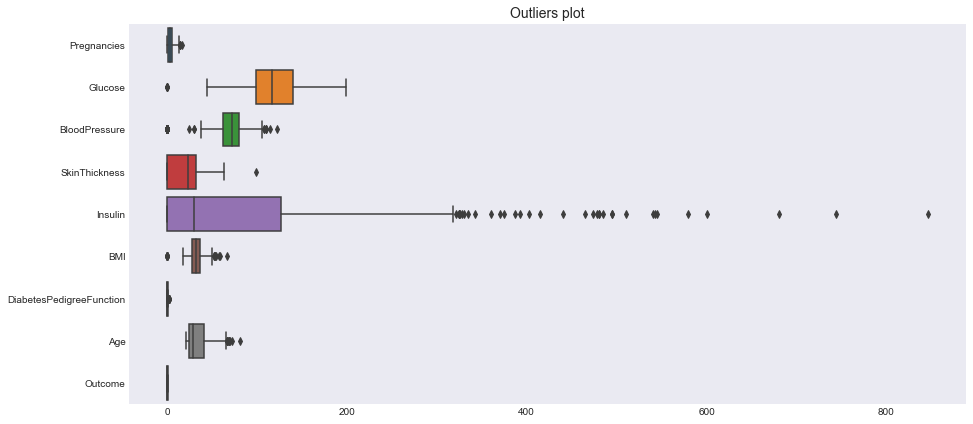

In [11]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']= (18, 11)
fig = plt.figure(figsize = (15, 7))
ax = sns.boxplot(data = df, orient='h')
plt.title('Outliers plot', fontsize = 14)
plt.show()

In [13]:
df[((df.Outcome == 1) & (df.Glucose == 0))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


***As it is observed that women who are diabatic have an mean glucose of 140+ this indicates that the glucose is high for diabitic patients and hence it cannot be 0. And this data should be removed***

#### Check out for diabatic person

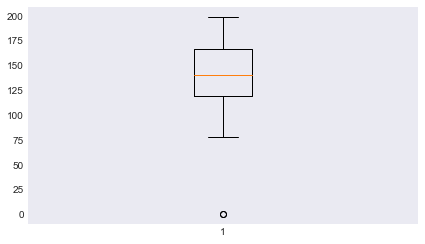

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [14]:
plt.rcParams['figure.figsize']= (7, 4)
plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df[((df.Outcome == 1) & (df.Glucose == 0))]

#### Check out for non-diabatic person

In [17]:
df[(df.Outcome == 0) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


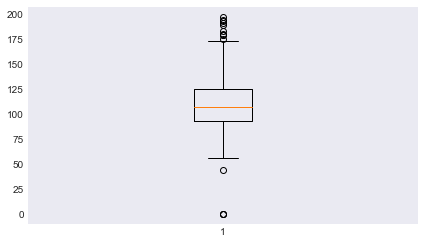

In [18]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

In [19]:
df[df.Outcome == 0].Glucose.describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [20]:
Q1 = df[df.Outcome == 0].Glucose.quantile(0.25)
Q2 = df[df.Outcome == 0].Glucose.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.Glucose < (Q1 - 1.5 * IQR)) |(df.Glucose > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]

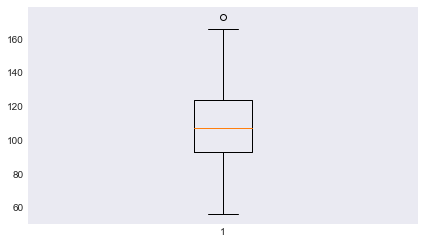

count    486.000000
mean     109.230453
std       22.326637
min       56.000000
25%       93.000000
50%      107.000000
75%      124.000000
max      173.000000
Name: Glucose, dtype: float64

In [21]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

df[df.Outcome == 0].Glucose.describe()


#### Check out the data in BloodPressure Column

##### Check out for diabatic women

In [22]:
df[df.Outcome == 1].BloodPressure.describe()

count    268.000000
mean      70.824627
std       21.491812
min        0.000000
25%       66.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

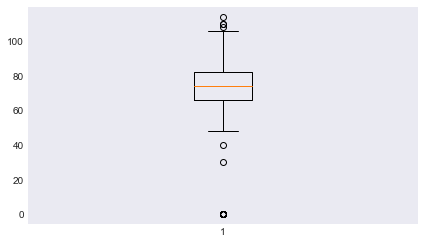

In [23]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [24]:
Q1 = df[df.Outcome == 1].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 1].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 1))]

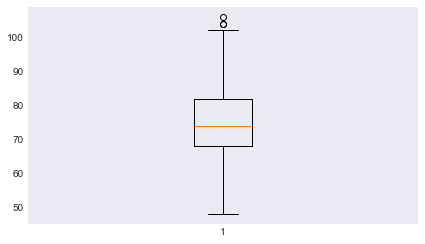

In [25]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [26]:
print(df[df.Outcome == 1].BloodPressure.describe())
print(df.shape)

count    246.000000
mean      75.077236
std       11.007888
min       48.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      106.000000
Name: BloodPressure, dtype: float64
(732, 9)


#### Check out for non-diabatic person

In [27]:
df[df.Outcome == 0].BloodPressure.describe()

count    486.000000
mean      68.006173
std       18.066029
min        0.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

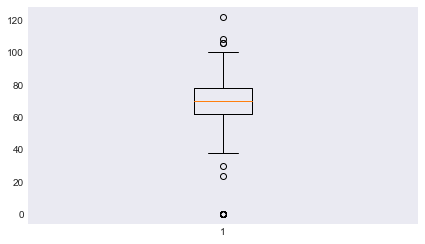

In [28]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [29]:
Q1 = df[df.Outcome == 0].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 0].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]

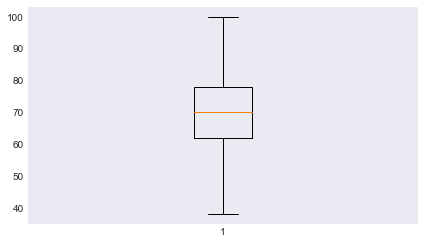

In [30]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [31]:
df[df.Outcome == 0].BloodPressure.describe()

count    461.000000
mean      70.618221
std       11.082184
min       38.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      100.000000
Name: BloodPressure, dtype: float64

In [32]:
df.shape

(707, 9)

#### Separating the dataset

In [33]:
X = df.drop(columns = 'Outcome', axis = 1)
Y = df.Outcome

print(X,Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


#### Data Standardization

In [35]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)


In [36]:
X = Standard_data
print(X)
print(Y)

[[ 0.64769636  0.89345294 -0.01509634 ...  0.20308664  0.47911916
   1.42650641]
 [-0.84975729 -1.17684606 -0.54875199 ... -0.78421765 -0.37961714
  -0.19138118]
 [ 1.24667783  2.04361905 -0.72663721 ... -1.24966109  0.61913051
  -0.1062292 ]
 ...
 [ 0.34820563  0.00618194 -0.01509634 ... -0.84063503 -0.70942166
  -0.27653316]
 [-0.84975729  0.17049138 -1.08240764 ... -0.2905655  -0.38583987
   1.17105047]
 [-0.84975729 -0.91395095 -0.19298156 ... -0.24825246 -0.49162622
  -0.87259701]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 707, dtype: int64


#### Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 1)
print(X.shape, X_train.shape, X_test.shape)

(707, 8) (565, 8) (142, 8)


#### Traing the model

In [40]:
lr = LogisticRegression()


lr.fit(X_train, Y_train)

lr_pred = lr.predict(X_test)

test_data_accuracy = accuracy_score(lr_pred, Y_test)

print(test_data_accuracy)



0.8098591549295775


In [46]:
#input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 =  (6,148,72,35,0,33.6,0.627,50)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data2)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshape)

# Prediction
prediction = lr.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic


### Logistic Regression with Hyperparameter

In [57]:
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }


In [58]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [62]:
best_clf = clf.fit(X_train, Y_train)
best_clf.best_score_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Krishna Vamshi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.65132838 ...        nan 0.77338737 0.77338737]
  warnings.warn(


0.7804795677136104

In [64]:
best_clf.best_params_

{'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [66]:
lr = LogisticRegression(**best_clf.best_params_)


lr.fit(X_train, Y_train)

lr_pred = lr.predict(X_test)

test_data_accuracy = accuracy_score(lr_pred, Y_test)

print(test_data_accuracy)


0.8169014084507042


**By tuing the parameters accuracy increased from 0.8098 to 0.8169**